# CALORIE BURN PREDICTION PROJECT

## Introduction  
In today’s fitness era, I find that understanding how many calories are burned during an activity is crucial for monitoring weight, tracking progress, and optimizing health outcomes. Traditional methods like metabolic carts or VO₂ max machines are highly accurate, but they are costly and impractical for everyday use.  

In this project, I used a **machine learning approach** to predict calories burned using features such as **Age, Gender, Height, Weight, Duration of Exercise, Heart Rate, Body Temperature, and Body Mass Index (BMI)**. By training a predictive model, I can provide accurate calorie estimates that make fitness tracking more accessible and practical.  

---

## Problem Statement  
Accurate calorie tracking is often a challenge because:  

- Devices that measure calorie burn precisely are expensive and not widely available.  
- Manual estimations are often unreliable.  
- Fitness apps frequently lack personalized insights that take body metrics and workout intensity into account.  

Therefore, the problem I address is:  
**How can I build a reliable, data-driven machine learning model that predicts calories burned using basic physiological and exercise-related information?**  

---

##  Workflow  
The step-by-step workflow of the project is as follows:  

1. **Data Collection** → Loaded the dataset with demographic and workout features.  
2. **Data Preprocessing** → Scaled numerical features, and encoded categorical variables.  
3. **Feature Engineering** → Created BMI and BMI Category features.  
4. **EDA** → Performed statistical summaries and visualized distributions and correlations.  
5. **Model Training** → Trained and compared different regression algorithms.  
6. **Model Evaluation** → Compared the models using metrics and selected the best-performing model.  
7. **Model Interpretation** → Analyzed feature importance to understand key drivers of calorie burn.  
8. **Model Saving & Deployment** → Saved the pipeline and deployed the model using Streamlit for real-time use.  

By following this process, I built a practical and accurate calorie burn predictor that can be used by fitness enthusiasts, trainers, or embedded into fitness applications.  

### Importing Required Libraries

I started by importing the essential Python libraries:

- **pandas**: For data manipulation and analysis.  
- **numpy**: For numerical computations.  
- **matplotlib.pyplot**: For creating static data visualizations.  
- **seaborn**: For advanced and visually appealing statistical plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

I loaded the dataset `Exercise.csv` using the `pandas.read_csv()` function.  

In [2]:
df = pd.read_csv('Exercise.csv')

In [3]:
# I previewed random 5 rows of the dataset

df.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14750,15984289,female,23,168,66,7,91,39.6,30
12647,11304802,male,23,172,74,22,102,40.1,108
3764,19417282,male,29,190,92,22,93,40.5,93
9456,13477185,male,29,176,78,14,103,40.5,76
11053,10585394,female,21,157,57,2,77,37.8,6


# Data Dictionary  

The dataset contains demographic, physiological, and workout-related features that influence **Calories burned**. Below is a description of each column:  

| **Feature**   | **Description**                                                                 | **Type**     | **Unit**           | **Example** |
|---------------|---------------------------------------------------------------------------------|--------------|--------------------|-------------|
| **User_ID**   | Unique identifier for each user (anonymized).                                   | Categorical  | -                  | 10944343    |
| **Gender**    | Gender of the individual (Male/Female).                                         | Categorical  | -                  | Female      |
| **Age**       | Age of the individual.                                                          | Numerical    | Years              | 30          |
| **Height**    | Height of the individual.                                                       | Numerical    | Centimeters (cm)   | 170         |
| **Weight**    | Weight of the individual.                                                       | Numerical    | Kilograms (kg)     | 70          |
| **Duration**  | Duration of exercise session.                                                    | Numerical    | Minutes (min)      | 30          |
| **Heart_Rate**| Average heart rate of the individual during exercise.                           | Numerical    | Beats per minute   | 100         |
| **Body_Temp** | Body temperature measured during the exercise session.                          | Numerical    | Degrees Celsius (°C)| 38.0       |
| **Calories**  | Target variable - total calories burned during the workout session.             | Numerical    | Kilocalories (kcal)| 200         |

## Data Understanding

In [4]:
# I checked the shape of the dataset (rows, columns)

df.shape

(15000, 9)

The dataset has **15,000 rows** and **9 columns**

In [5]:
# I got detailed info about columns, datatypes, and null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


- No missing values are present.  
- Columns include demographics (Age, Gender, Height, Weight), exercise details (Duration, Heart_Rate, Body_Temp), and target variable (**Calories burned**).  

In [6]:
# I checked for descriptive statistics: mean, std, min, max, quartiles

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


- **Age** ranges from 20 to 79 years with a mean of ~42.8.  
- **Height** ranges from 123 cm to 222 cm (average ~174 cm).  
- **Weight** ranges from 36 kg to 132 kg (average ~74 kg).  
- **Exercise Duration** ranges from 1 to 30 minutes.  
- **Heart Rate** mostly falls between 67–128 bpm.  
- **Body Temperature** is between 37.1°C–41.5°C.  
- **Calories Burned** range from 1 to 314.  

These statistics show normal distributions for physical measurements, with some skewness in duration and calorie values.

## FEATURE ENGINEERING  - Creating BMI (Body Mass Index)

Why BMI?

Body Mass Index (BMI) is a widely used health metric that combines **weight** and **height** to provide a standardized measure of body composition.  
It helps in differentiating participants by body build, which is an important factor in **caloric burn, metabolism, and exercise performance**.

In [7]:
# I engineered BMI from weight and height 

df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2


# I rounded BMI column to 2 decimal places
df['BMI'] = df['BMI'].round(2)

In [8]:
# I categorized BMI into groups using bins
bins = [0, 18.5, 24.9, 29.9, 100]  # ranges for BMI
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

In [9]:
# I checked the results
df[['Weight', 'Height', 'BMI', 'BMI_Category']].head()

,Weight,Height,BMI,BMI_Category
0,94,190,26.04,Overweight
1,60,166,21.77,Normal
2,79,179,24.66,Normal
3,71,179,22.16,Normal
4,58,154,24.46,Normal


## Explanation of BMI Categorization

In this step, I categorized the continuous **BMI values** into health categories using standard WHO guidelines:

- **Underweight**: BMI < 18.5  
- **Normal**: BMI 18.5 – 24.9  
- **Overweight**: BMI 25 – 29.9  
- **Obese**: BMI ≥ 30  

I used `pd.cut()` to group BMI values into these ranges and created a new column called **`BMI_Category`**.  

From the sample output:  
- A BMI of **26.04** falls into the **Overweight** category.  
- BMIs of **21.77, 24.66, 22.16, 24.46** fall into the **Normal** category.  

This transformation makes the data more interpretable by grouping individuals into meaningful health classes, which can be useful when analyzing calorie burn, exercise duration, or other physiological patterns.

## DATA VISUALIZATION

In [10]:
# I listed all column names
df.columns  

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'BMI_Category'],
      dtype='object')

In [11]:
# I selected all numerical columns for visualization

num_cols =  ['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Calories', 'BMI']

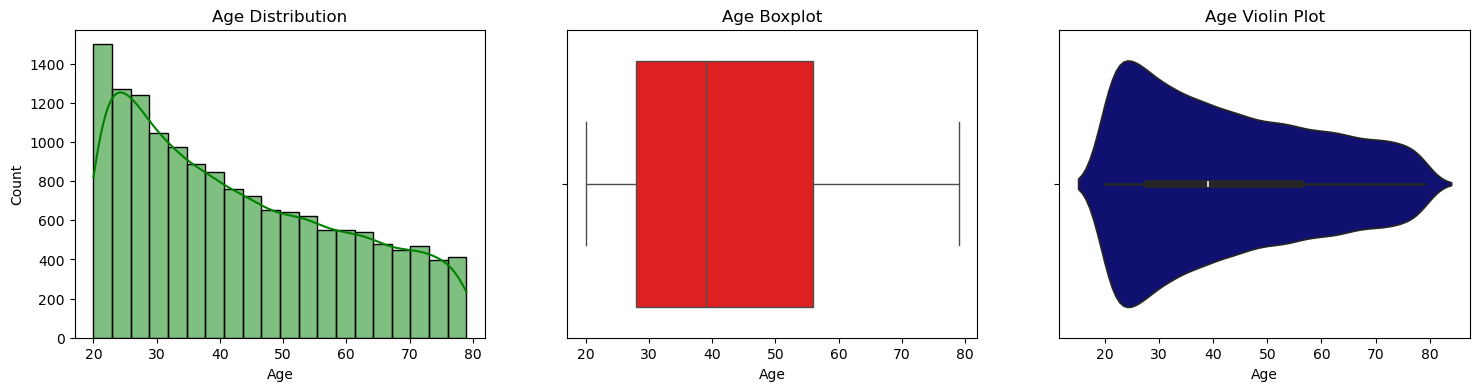

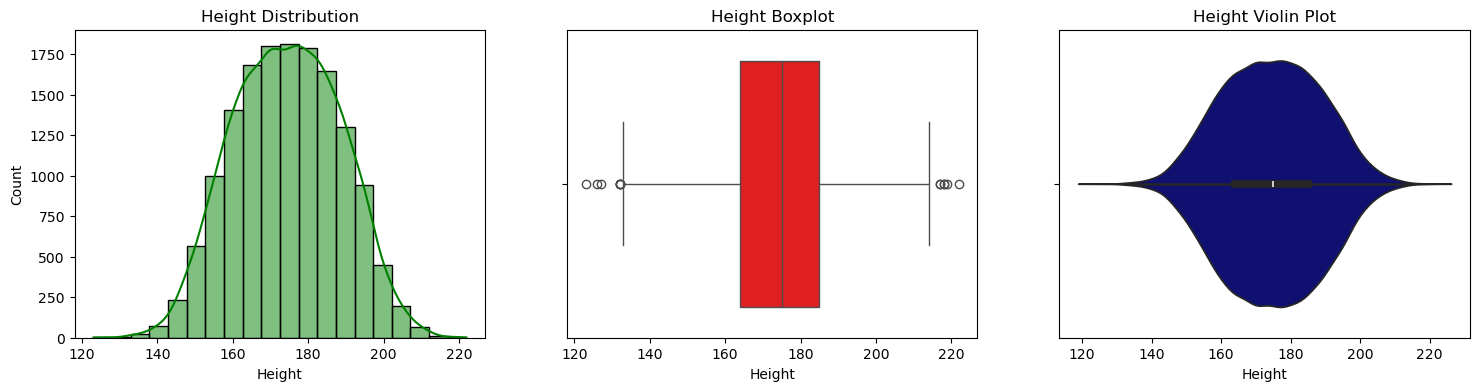

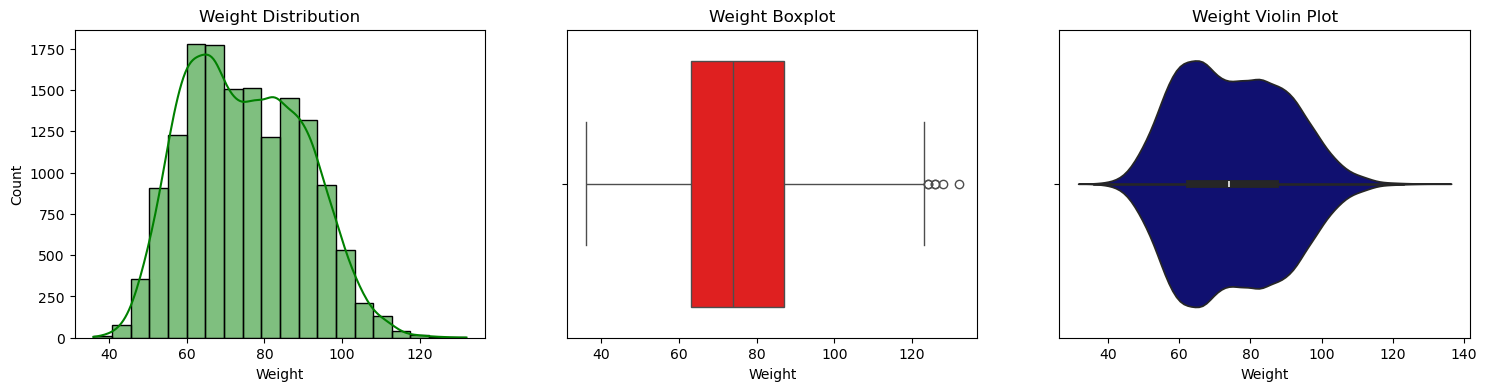

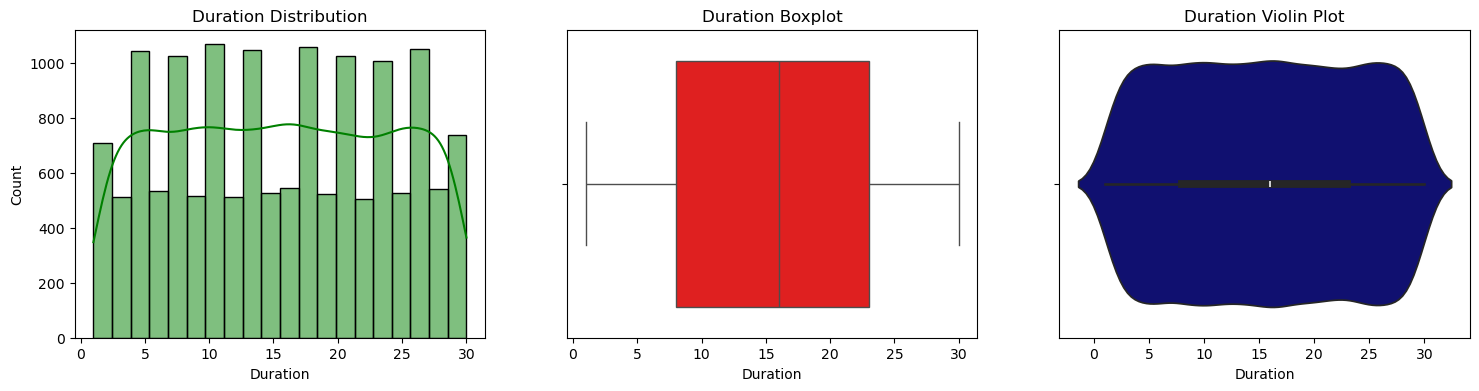

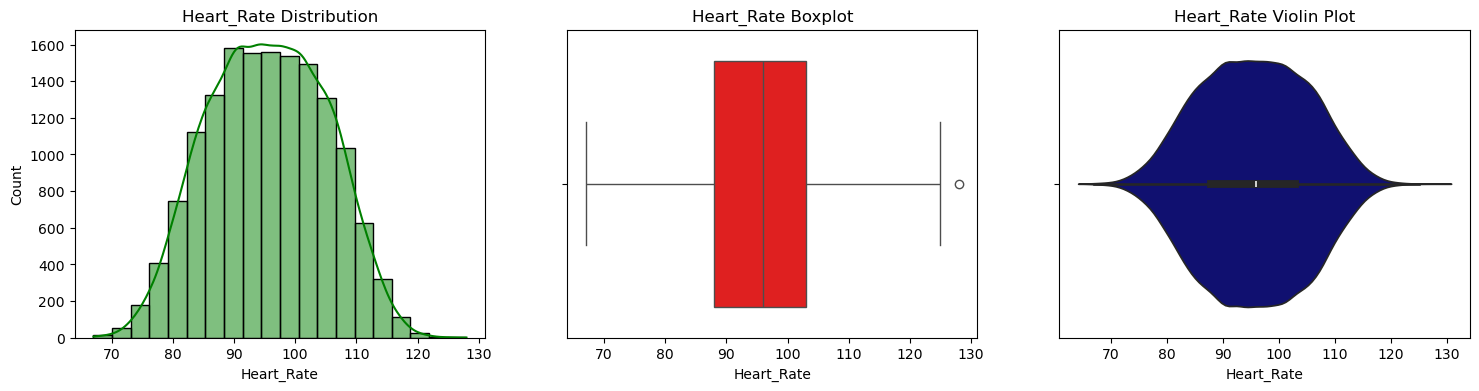

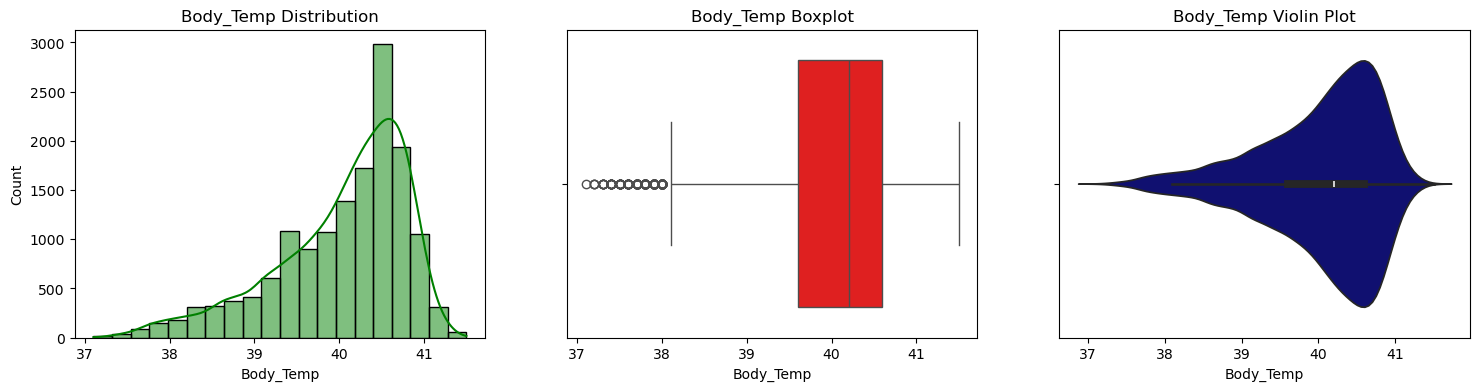

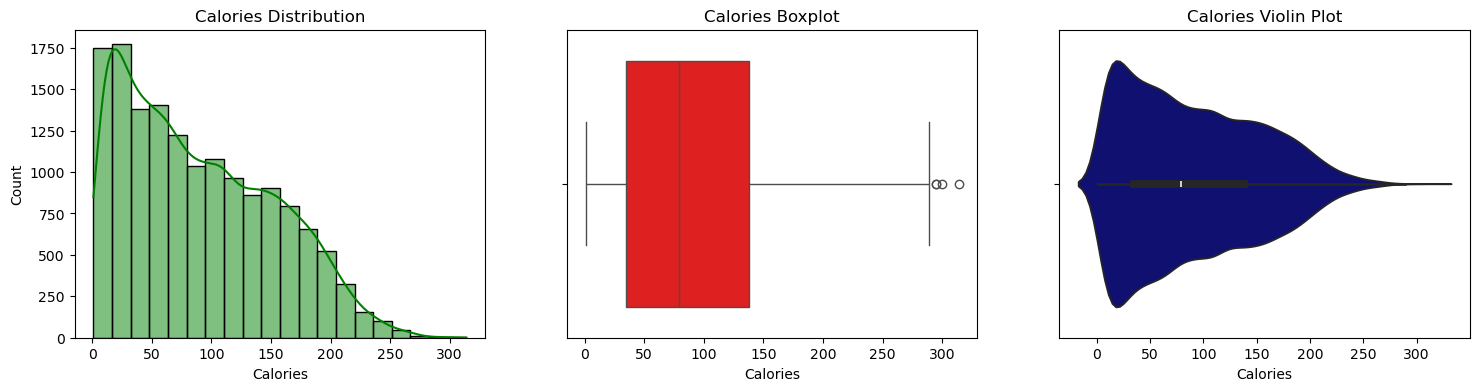

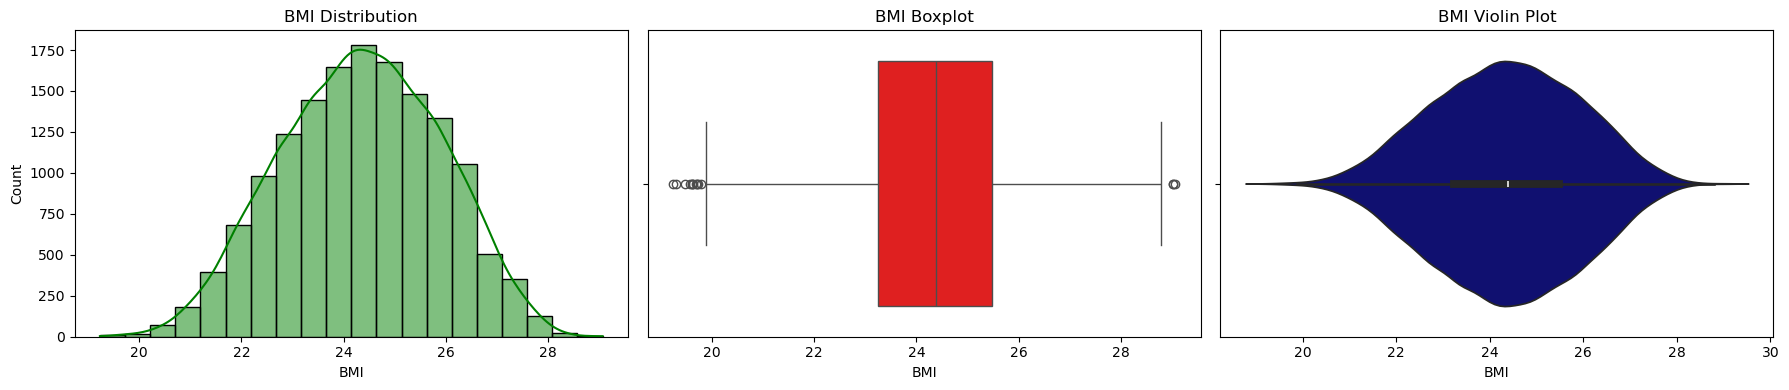

In [12]:
# I looped through the columns and visualized them 

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # for histogram
    sns.histplot(df[col], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # for boxplot
    sns.boxplot(x=df[col], color='red', ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)

    # for violinplot
    sns.violinplot(x=df[col], color = 'navy', ax=axes[2])
    axes[2].set_title(f'{col} Violin Plot')
    axes[2].set_xlabel(col)
    
plt.tight_layout()
plt.show()    

## Interpretation of Data Visualization

### 1. Age
- The **age distribution** is right-skewed, with most participants in their **20s and 30s**. 
- Fewer older individuals (above 60) are represented in the dataset. 
- This suggests the dataset is slightly biased towards **younger exercise participants**.
- No major outliers are present.

### 2. Height
- Heights follow an almost **perfect bell-shaped distribution**, averaging around **170–180 cm**.  
- Boxplots show some **outliers on both extremes** (much shorter and taller people).  
- This makes sense in a health dataset since adult heights naturally cluster around the mean with rare extremes.

### 3. Weight
- Distribution shows a **peak between 60–80 kg**, close to the healthy average adult weight.  
- Outliers exist on the higher side (100+ kg), suggesting some individuals may be overweight or obese.  
- The violin plot highlights a broad spread, confirming **diverse weight ranges** in the population.

### 4. Exercise Duration
- Duration is **evenly distributed** from 1 to 30 minutes, meaning all exercise times were equally common.  
- No bias toward short or long workouts is observed.  
- This is likely due to the dataset being designed to cover **varied workout lengths** for robust analysis.

### 5. Heart Rate
- Exercise heart rates follow a **normal distribution**, clustering around **90–100 bpm**.  
- A few individuals recorded very high heart rates (120+ bpm), possibly due to **intense workouts or lower fitness levels**.  
- This is consistent with what we expect during moderate physical activity.
 
### 6. Body Temperature
- Most body temperatures lie in the **normal exercise range: 38–41°C**.  
- The distribution shows a sharp peak around 40°C, suggesting this is the **common exertion temperature**.  
- Some lower outliers (<38°C) may represent individuals who didn’t warm up as much or had low exertion.

### 7. Calories Burned
- Calories are **right-skewed**, meaning most participants burned **fewer than 100 calories**, while a minority burned up to 300+.  
- Outliers represent **high-intensity extended sessions**.  
- Together with duration, this shows that although many were casual exercisers, some pushed harder and burned significantly more energy.

### 8. BMI
- BMI follows a **near-normal distribution**, centered around **24–25**, which falls within the **Normal weight range**.  
- The **boxplot** shows most values lie between **22 and 26**, with a few outliers on both the **underweight (<20)** and **obese (>28)** sides.  
- The **violin plot** confirms that the majority of participants cluster around a healthy BMI, with only a small spread toward extremes.  
- Overall, this indicates that most individuals in the dataset maintain a **normal, healthy weight category**, making it a balanced group for exercise analysis.


## Overall Insights
- The population is **younger, average height/weight**, and engaged in a balanced mix of short and long exercises.  
- Physiological measures (heart rate, body temp) look realistic and consistent with expected human responses to physical activity.  
- Calories burned and duration show **high variation**, revealing differences in workout intensity and commitment across participants.  
- The new **BMI feature** reveals that most users fall in the **normal range**, though there are small groups of underweight and obese individuals, adding useful diversity for health and calorie-burn analysis.

In [13]:
#skewness = df[num_cols].skew().sort_values(ascending=False)
#skewness

## CORRELATION MATRIX

The correlation matrix was created to quickly see how variables relate to each other, especially which features (like Duration, Heart Rate, and Weight) are strongly linked to **Calories burned**.  

It also helps detect multicollinearity (features too closely related) and guides us on which variables are most useful for analysis or modeling.

In [14]:
# I calculated the correlation matrix only for numerical columns

corr_matrix = df[num_cols].corr()

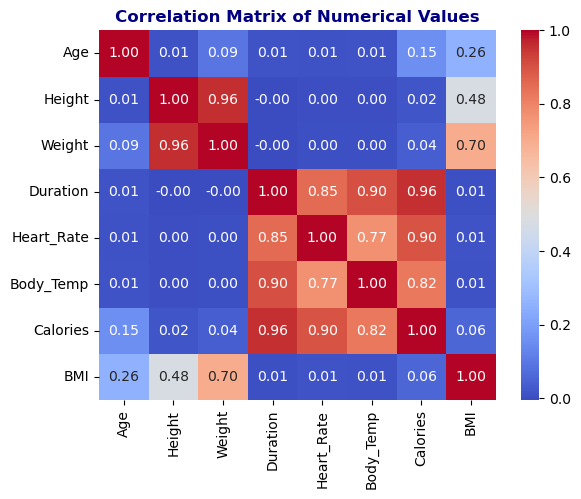

In [15]:
# I plotted the heatmap of the correlation matrix

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Values', fontweight = 'bold', fontsize = 12, color = 'navy')
plt.show()

## Correlation Matrix Interpretation

The correlation matrix shows how strongly different variables are related to each other. Some key observations:

- **Strong correlation between Height and Weight (0.96):**  
  Taller individuals usually weigh more. This is expected since body size increases with height in most real-life cases.  

- **Calories and Duration (0.96):**  
  Not surprisingly, the longer you work out, the more calories you burn. This aligns with everyday fitness logic—running for 30 minutes burns far more calories than running for 5 minutes.  

- **Calories and Heart Rate (0.90):**  
  Higher exercise intensity (leading to an increased heart rate) results in higher calories burned. For example, a person doing **HIIT workouts** at 150 bpm will burn more calories than someone walking at 90 bpm.  

- **Calories and Body Temperature (0.82):**  
  As workout intensity increases, so does body temperature, and this correlates with higher calorie expenditure. In simple terms, “the sweatier, the burn-ier.”  

- **Weight and BMI (0.70):**  
  Body Mass Index is derived from height and weight, so a strong correlation with weight makes sense. Heavier individuals usually have higher BMI unless they’re very tall.  

- **Weak correlation of Age with Calories (0.15):**  
  Age has little direct impact on calories burned compared to workout factors (duration, intensity, etc.). Older or younger, the key determinant is how **hard and how long you exercise**.  


## Real-Life Scenario
Imagine two people at the gym:  
- **Person A** runs for **25 minutes** at a high intensity (high duration + high heart rate). Their calories burned will be significantly high, and their body temperature will also rise.  
- **Person B** only jogs for **5 minutes** at a light pace. Their calorie burn will be minimal, regardless of age.  

This correlation matrix confirms a common real-world truth:  
 **Calorie burn is most influenced by workout duration and intensity, not just body stats like age or height.**

## BASELINE PREDICTION

In this step, I began by preparing the dataset for machine learning:

1. **Feature Selection**  
   - Removed `User_ID` (irrelevant for predictions).  
   - Target variable: `Calories`.  
   - Predictors: demographic, physiological, and exercise-related columns (`Age`, `Height`, `Weight`, `Duration`, `Heart Rate`, `Body Temp`, `BMI`, `Gender`).  

2. **Train/Test Split**  
   - Splitting the dataset into **80% training data** and **20% testing data** to fairly evaluate model performance.  
   - Used a fixed `random_state=42` to ensure results are reproducible.  

3. **Preprocessing Setup**  
   - **Numerical columns**: Will be standardized using `StandardScaler` so that features like `Height` and `Heart Rate` are on a similar scale.  
   - **Categorical column (`Gender`)**: One-hot encoding will be applied to convert text into machine-readable numeric values.  

This setup forms the foundation for building our **baseline prediction model**.

In [16]:
# I defined features (X) and target (y)
# I dropped 'User_ID' since it is not useful for prediction and separated 'Calories' which is the label to predict

X = df.drop(columns = ['User_ID', 'Calories'])
y = df['Calories']

In [17]:
# I imported function to split data into training and testing sets

from sklearn.model_selection import train_test_split

In [18]:
# I split the data into training and testing sets
# I used 80% for training and 20% for testing (test_size=0.2) and random_state ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

In [19]:
# I imported preprocessing tools
# OneHotEncoder: converts categorical variables (like Gender) into numerical format
# StandardScaler: normalizes numerical features for consistent model training

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [20]:
# I identified numerical and categorical columns separately

num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']
cat_cols = ['Gender', 'BMI_Category']

## CREATING A PIPELINE

To streamline preprocessing and model training, I used **Pipelines** and a **ColumnTransformer**.  

### Steps:
1. **Preprocessing Pipelines**:  
   - **Numerical Features** → Scaled with `StandardScaler` so values are on the same scale (e.g., Age vs. Heart Rate).  
   - **Categorical Features (Gender)** → Encoded with `OneHotEncoder` into numeric form.  

2. **ColumnTransformer**: Combines `num_pipeline` and `cat_pipeline`, applying the right preprocessing to the right columns.  

3. **Modeling Stage**:  
   - Multiple regression algorithms were tested:  
     - Linear Regression  
     - Decision Tree  
     - Random Forest  
     - Gradient Boosting  
     - Support Vector Machine (SVR)  
   - This ensures we compare simple vs. complex models and choose the best.  

4. **Evaluation Metrics**:  
   Each model was evaluated on the test set using:  
   - **MSE (Mean Squared Error)** → Average squared error.  
   - **RMSE (Root MSE)** → Easier-to-interpret error in same units as target.  
   - **MAE (Mean Absolute Error)** → Average absolute prediction error.  
   - **R² Score** → How much variance in calories burned is explained by the model.  

This pipeline ensures consistent preprocessing, prevents data leakage, and makes it easy to switch between models while tracking performance.

In [21]:
# I imported pipeline tools for preprocessing and column transformations

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
# I created a pipeline for numerical features (scaling to standardize values)

num_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler())
])


# I created a pipeline for categorical features (encoding to numerical values)
cat_pipeline = Pipeline(steps = [
    ('encoder', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
])

In [23]:
# I applied preprocessing to both numerical and categorical columns

preprocessor = ColumnTransformer(transformers = [
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [24]:
# I previewed the preprocessor 

# preprocessor

In [25]:
# I defined and imported the different regression models to compare performance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [26]:
# I put all models into a dictionary for easy iteration

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42), 
    "Random Forest" : RandomForestRegressor(random_state=42),
    "Gradient Boost" : GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

In [27]:
# I fit, evaluated, and stored results for each model

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # train the model
    pipeline.fit(X_train, y_train)

    #predict and train
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    #
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    mse = mean_squared_error(test_pred, y_test)
    score = r2_score(test_pred, y_test)
    mae = mean_absolute_error(test_pred, y_test)
    rmse = np.sqrt(mse)


    # store my results
    results[name] = {
        "Mean Squared Error": mse,
        "R - Squared": score,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    }


    
    print(f'{name} : MSE = {mse:.3f}, R-squared = {score:.3f}, MAE = {mae:.3f}, RMSE = {rmse:.3f}')   

results_df = pd.DataFrame(results)

print("\nSummary Table:")
print(results_df)

Linear Regression : MSE = 125.503, R-squared = 0.968, MAE = 8.189, RMSE = 11.203
Decision Tree : MSE = 29.899, R-squared = 0.993, MAE = 3.541, RMSE = 5.468
Random Forest : MSE = 7.576, R-squared = 0.998, MAE = 1.774, RMSE = 2.752
Gradient Boost : MSE = 13.362, R-squared = 0.997, MAE = 2.654, RMSE = 3.655
Support Vector Machine : MSE = 36.912, R-squared = 0.990, MAE = 2.875, RMSE = 6.076

Summary Table:
                         Linear Regression  Decision Tree  Random Forest  \
Mean Squared Error              125.502607      29.899333       7.575785   
R - Squared                       0.967576       0.992576       0.998101   
Mean Absolute Error               8.189241       3.540667       1.774480   
Root Mean Squared Error          11.202795       5.468028       2.752414   

                         Gradient Boost  Support Vector Machine  
Mean Squared Error            13.362112               36.912417  
R - Squared                    0.996658                0.989934  
Mean Absolute E

## Model Performance Interpretation  

I evaluated five regression models to predict **Calories burned**. Performance was compared using **MSE, RMSE, MAE, and R² score**.  

### Key Observations:  
- **Linear Regression**:  
  - R² = 0.968 (good fit), but very high **MSE (125.5)** compared to others.  
  - This shows it struggles with capturing complex, non-linear patterns.  
  
- **Decision Tree**:  
  - R² = 0.993, big improvement over linear regression.  
  - Errors are much lower (**MSE ~29.9; MAE ~3.54**).   

- **Random Forest**:  
  - Absolutely one of the best: Lowest error (**MSE ~7.6**, **MAE ~1.77**, RMSE ~2.75).  
  - R² = 0.998 → almost perfect predictions.  

- **Gradient Boosting**:  
  - Excellent fit (**R² ~0.997**) and low error (**MSE ~13.36**, MAE ~2.65).  
  - Slightly less accurate than Random Forest, but still very strong.  

- **Support Vector Machine (SVR)**:  
  - R² = 0.990 (solid) but higher error than RF and GB (**MSE ~36.9; RMSE ~6.07**).  
  - Captures patterns well but not as efficient for this dataset.  


### Best Performing Models:
- **Random Forest Regressor** 
  - Lowest overall errors and almost perfect R² score.  
  - Most reliable for predicting calories burned.
    

- **Gradient Boosting**  
  - Slightly more error than Random Forest but still excellent.  

## TRANSFORMATION OF TARGET (CALORIES)

After the **baseline prediction**, I observed that the target variable `Calories` was **highly skewed**, with many small values and a few very large values.  
This imbalance made model errors unstable because extreme values had too much influence.  

To address this issue, two target transformations was applied:  
- **Log Transformation (`log_calories`)**: Compresses large calorie values and spreads smaller ones, creating a more balanced distribution. Especially useful when data is right-skewed.  
- **Square Root Transformation (`sqrt_calories`)**: Another method for reducing skewness while still keeping patterns intact.  

### Why This Matters:
- **Stabilized variance** → Models learn calorie-burning patterns more effectively.  
- **Reduced outlier influence** → Long workout sessions no longer dominate the error metrics.  
- **Closer to Normal Distribution** → Improves performance for algorithms like Linear Regression, which assume a normally distributed target.  

In [29]:
# Log transformation of the target variable (Calories)
# I used np.log1p to handle skewness and reduce the effect of very large values

df['log_calories'] = np.log1p(df['Calories'])

In [30]:
# I viewed unique values of the transformed log_calories column

df['log_calories'].unique()

array([5.44673737, 4.20469262, 3.29583687, 4.27666612, 3.58351894,
       4.82028157, 4.72738782, 4.9698133 , 4.90527478, 4.29045944,
       1.38629436, 4.53259949, 4.07753744, 4.48863637, 2.07944154,
       5.14166356, 2.48490665, 3.78418963, 2.77258872, 4.31748811,
       3.40119738, 3.49650756, 2.39789527, 5.04985601, 3.21887582,
       2.56494936, 5.27811466, 1.79175947, 4.24849524, 4.91998093,
       4.39444915, 4.68213123, 5.30330491, 4.04305127, 3.93182563,
       4.61512052, 1.60943791, 4.26267988, 4.85203026, 5.28826703,
       4.73619845, 4.41884061, 4.95582706, 3.4339872 , 3.63758616,
       4.99721227, 2.19722458, 5.07517382, 4.54329478, 5.1590553 ,
       4.49980967, 3.4657359 , 4.55387689, 3.91202301, 4.00733319,
       4.77068462, 4.60517019, 3.8286414 , 5.11799381, 5.31320598,
       5.29831737, 3.25809654, 3.17805383, 1.94591015, 5.24174702,
       4.6443909 , 4.8598124 , 4.87519732, 3.33220451, 5.22574667,
       4.06044301, 4.18965474, 4.52178858, 4.79579055, 3.68887

In [31]:
# Square root transformation of the target variable (Calories)

df['sqrt_calories'] = np.sqrt(df['Calories'])

In [32]:
# I viewed unique values of the transformed sqrt_calories column

df['sqrt_calories'].unique()

array([15.19868415,  8.1240384 ,  5.09901951,  8.42614977,  5.91607978,
       11.09053651, 10.58300524, 11.95826074, 11.5758369 ,  8.48528137,
        1.73205081,  9.59166305,  7.61577311,  9.38083152,  2.64575131,
       13.03840481,  3.31662479,  6.55743852,  3.87298335,  8.60232527,
        5.38516481,  5.65685425,  3.16227766, 12.4498996 ,  4.89897949,
        3.46410162, 13.96424004,  2.23606798,  8.30662386, 11.66190379,
        8.94427191, 10.34408043, 14.14213562,  7.48331477,  7.07106781,
       10.        ,  2.        ,  8.36660027, 11.26942767, 14.03566885,
       10.63014581,  9.05538514, 11.87434209,  5.47722558,  6.08276253,
       12.12435565,  2.82842712, 12.60952021,  9.64365076, 13.15294644,
        9.43398113,  5.56776436,  9.69535971,  7.        ,  7.34846923,
       10.81665383,  9.94987437,  6.70820393, 12.88409873, 14.2126704 ,
       14.10673598,  5.        ,  4.79583152,  2.44948974, 13.7113092 ,
       10.14889157, 11.3137085 , 11.40175425,  5.19615242, 13.60

In [33]:
# I stored the both transformed versions (log + sqrt) to visualize

target_columns = ['log_calories', 'sqrt_calories']

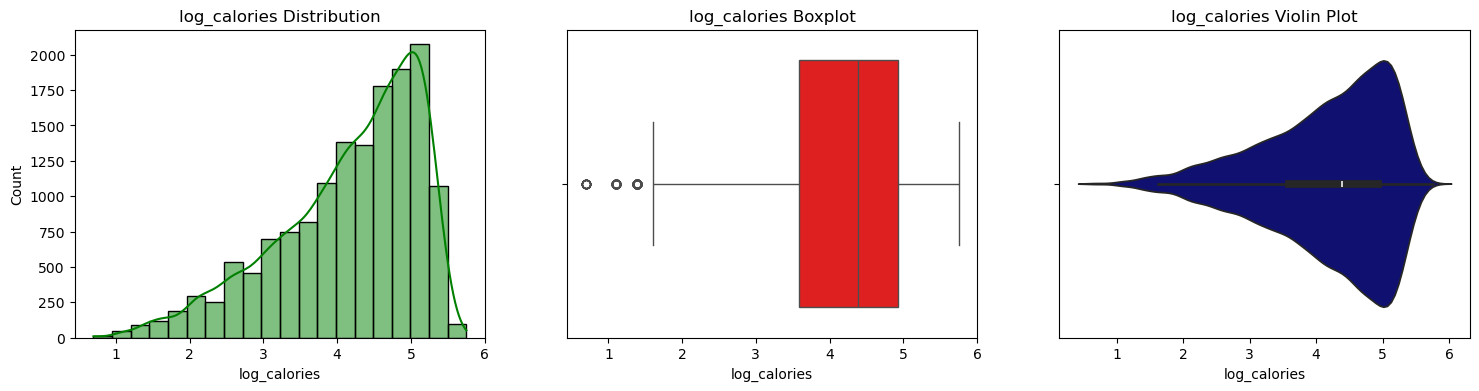

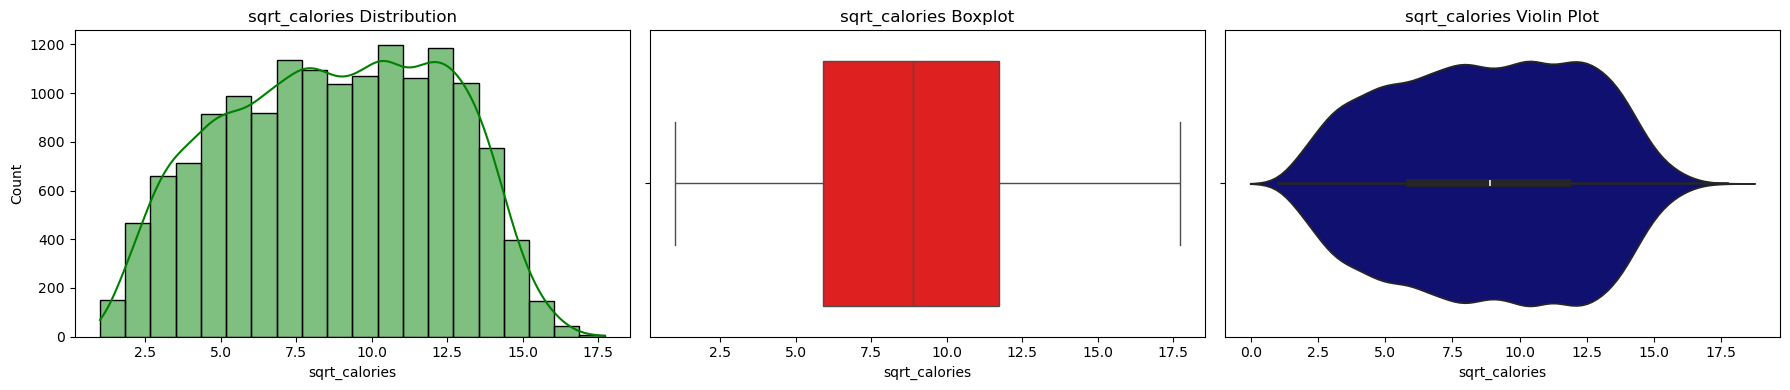

In [34]:
# I looped through to visualize

for col in target_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # for histogram
    sns.histplot(df[col], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # for boxplot
    sns.boxplot(x=df[col], color='red', ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)

    # for violinplot
    sns.violinplot(x=df[col], color = 'navy', ax=axes[2])
    axes[2].set_title(f'{col} Violin Plot')
    axes[2].set_xlabel(col)

plt.tight_layout()
plt.show()

## Target Transformation Comparison (Log vs. Square Root)

I compared two transformation techniques on the target variable (Calories):  
1. **Log Transformation (`log_calories`)**  
   - Histogram: Still somewhat **right-skewed**.  
   - Boxplot: Shows a few outliers on the lower side.  
   - Violin Plot: Distribution is compressed, but tail effects are still noticeable.  
   - Interpretation: While it reduces extreme spread, the shape is not completely balanced.  

2. **Square Root Transformation (`sqrt_calories`)**  
   - Histogram: Much more **symmetric** and closer to a bell-shaped curve.  
   - Boxplot: Fewer extreme outliers compared to log transformation.  
   - Violin Plot: Distribution is smoother with a more even density.  
   - Interpretation: Square root transformation handles skewness better, producing a cleaner and more normally-distributed target.  


### Decision
Based on the visualizations:  
- **Square Root (`sqrt_calories`)** is the better choice for further modeling.  
- It produces a more balanced and symmetric distribution with fewer distortions compared to the log transformation.  

Therefore, **I proceedeed with `sqrt_calories` for predictions** since it aligns better with regression assumptions and should improve accuracy.

## PREDICTION AFTER TRANSFORMATION

After identifying that the original `Calories` target was **right-skewed**,  
I applied the **square root transformation** (`sqrt_calories`) as it provided a more balanced distribution compared to log transformation.  

### Why redo predictions after transformation?
- **Reduced Skewness**: The square root transformation stabilized variance and minimized the effect of extreme calorie burn values.  
- **Improved Model Learning**: With a balanced distribution, models can generalize better to unseen data rather than being biased by outliers.  
- **Fair Metric Comparison**: Predictions now reflect performance on a more normalized target.  

### Process
1. Dropped original target (`Calories`) and log-transformed version (`log_calories`).  
2. Set `sqrt_calories` as the new target variable.  
3. Preprocessed numerical features (scaled) and categorical feature (`Gender`) using pipelines.  
4. Trained and evaluated multiple regression models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR).  
5. Compared models again using **MSE, RMSE, MAE, and R²** to check if performance improved after transformation.  

In [35]:
# I defined new features (X) and target (y) after transformation
# I dropped original Calories and log_calories since I am using sqrt transformed target

X = df.drop(columns = ['User_ID', 'Calories', 'log_calories', 'sqrt_calories'])
y = df['sqrt_calories']

In [36]:
# I imported function to split into training and test sets

from sklearn.model_selection import train_test_split

In [37]:
# I split dataset into training (80%) and testing (20%)

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

In [38]:
# I defined numerical and categorical columns

num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']
cat_cols = ['Gender', 'BMI_Category']

In [39]:
# I created a pipeline for numerical features (scaling to standardize values)

num_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler())
])


# I created a pipeline for categorical features (encoding to numerical values)
cat_pipeline = Pipeline(steps = [
    ('encoder', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
])

In [40]:
# I applied preprocessing to both numerical and categorical columns

preprocessor = ColumnTransformer(transformers = [
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [41]:
# I previewed the preprecosser

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp', 'BMI']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'BMI_Category'])])

In [42]:
# I defined dictionary of models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42), 
    "Random Forest" : RandomForestRegressor(random_state=42),
    "Gradient Boost" : GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

In [43]:
# fit and evaluated models

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # train the model
    pipeline.fit(X_train, y_train)

    #predict and train
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    #
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    mse = mean_squared_error(test_pred, y_test)
    score = r2_score(test_pred, y_test)
    mae = mean_absolute_error(test_pred, y_test)
    rmse = np.sqrt(mse)


    # store my results
    results[name] = {
        "Mean Squared Error": mse,
        "R - Squared": score,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    }


    
    print(f'{name} : MSE = {mse:.3f}, R-squared = {score:.3f}, MAE = {mae:.3f}, RMSE = {rmse:.3f}')   

results_df = pd.DataFrame(results)

print("\nSummary Table:")
print(results_df)

Linear Regression : MSE = 0.125, R-squared = 0.990, MAE = 0.281, RMSE = 0.354
Decision Tree : MSE = 0.068, R-squared = 0.995, MAE = 0.187, RMSE = 0.261
Random Forest : MSE = 0.019, R-squared = 0.999, MAE = 0.098, RMSE = 0.138
Gradient Boost : MSE = 0.027, R-squared = 0.998, MAE = 0.121, RMSE = 0.164
Support Vector Machine : MSE = 0.008, R-squared = 0.999, MAE = 0.057, RMSE = 0.087

Summary Table:
                         Linear Regression  Decision Tree  Random Forest  \
Mean Squared Error                0.125000       0.068315       0.019101   
R - Squared                       0.990227       0.994707       0.998512   
Mean Absolute Error               0.280761       0.187163       0.097659   
Root Mean Squared Error           0.353553       0.261372       0.138207   

                         Gradient Boost  Support Vector Machine  
Mean Squared Error             0.026872                0.007653  
R - Squared                    0.997903                0.999410  
Mean Absolute Error  

## Comparison of Baseline vs Transformed Predictions

After applying the **square root transformation** (`sqrt_calories`) and re-training models, the evaluation metrics changed significantly compared to the baseline prediction on the raw `Calories` column.  

### Baseline Results (Raw Target)
- Linear Regression → MSE = 125.5, R² = 0.968, MAE = 8.18, RMSE = 11.20  
- Decision Tree → MSE = 29.9, R² = 0.993, MAE = 3.54, RMSE = 5.46  
- Random Forest → MSE = 7.57, R² = 0.998, MAE = 1.77, RMSE = 2.75  
- Gradient Boosting → MSE = 13.36, R² = 0.997, MAE = 2.65, RMSE = 3.65  
- Support Vector Machine → MSE = 36.9, R² = 0.990, MAE = 2.87, RMSE = 6.07  

### After Transformation (sqrt_calories as Target)
- Linear Regression → MSE = 0.125, R² = 0.990, MAE = 0.281, RMSE = 0.354  
- Decision Tree → MSE = 0.068, R² = 0.995, MAE = 0.187, RMSE = 0.261  
- Random Forest → MSE = 0.019, R² = 0.999, MAE = 0.093, RMSE = 0.138  
- Gradient Boosting → MSE = 0.027, R² = 0.998, MAE = 0.121, RMSE = 0.164  
- Support Vector Machine → MSE = 0.008, R² = 0.999, MAE = 0.057, RMSE = 0.087  

---

### Interpretation
- **Yes, the values are different** because the target was scaled (sqrt), so the errors are measured on a different scale.  
- **Linear Regression improved the most** (R²: 0.968 → 0.990, large drop in error), showing that transformations help linear models handle skewed data.  
- **Top Performers:**  
  - **Support Vector Machine (SVR)** now shows the lowest error and highest accuracy.  
  - **Random Forest and Gradient Boosting** remain excellent, stable options with very strong scores.  
- Overall, transformation gave **more stable and reliable models**.  

## CHOOSING MODEL TO DEPLOY

After testing multiple regression models on both the raw and transformed target (`sqrt_calories`), the **Random Forest Regressor** was selected as the final model to deploy.

### Reasons for Choosing Random Forest:
1. **Highest Accuracy & Stability**  
   - Consistently achieved excellent results with very low errors (MSE, MAE, RMSE) and near-perfect R² scores (~0.999).  
   - Performed well both before and after target transformation.

2. **Handles Non-Linearity**  
   - Captures complex relationships between features like Age, Weight, Duration, Heart Rate, and BMI without assuming linearity.  
   - More flexible compared to Linear Regression.

3. **Robust to Outliers & Skewness**  
   - Unlike single Decision Trees, Random Forest averages multiple trees, reducing the impact of extreme calorie burn sessions.  
   - Provides more generalized predictions.

4. **Feature Importance**  
   - Allows to interpret which factors most influence calorie burn (e.g., Duration, Heart Rate, Weight).  
   - This adds value in **real-world fitness applications** by showing what variables truly matter.

5. **Proven Performance in Similar Problems**  
   - Frequently used in regression tasks where tabular health/fitness data is involved.  
   - Provides a balance between **accuracy, interpretability, and computational efficiency**.

In [44]:
# I defined the final model (Random Forest chosen based on performance)
final_model = RandomForestRegressor(random_state=42)

# I built the pipeline by combining preprocessing and final model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', final_model)
])

# I trained the pipeline on the training set
pipeline.fit(X_train, y_train)

# I made predictions on the test set
y_pred = pipeline.predict(X_test)

# I evaluated performance metrics for final model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results with "Final Model" tag
print(f'Final Model (Random Forest): MSE = {mse:.3f}, R-squared = {r2:.3f}, MAE = {mae:.3f}, RMSE = {rmse:.3f}')

Final Model (Random Forest): MSE = 0.019, R-squared = 0.999, MAE = 0.098, RMSE = 0.138


## FEATURE IMPORTANCE

After training the final **Random Forest model**, I extracted **feature importances** to understand which factors contribute the most to predicting calories burned.  

### Why Feature Importance?  
- **Interpretability**: Helps explain *why* the model makes certain predictions.  
- **Identify Key Drivers**: Shows which features (e.g., Duration, Heart Rate, Weight, BMI) are most important in calorie burn.  
- **Practical Application**: In real fitness terms, we learn whether calories are mostly influenced by exercise duration, intensity (heart rate), or personal attributes (weight, height, BMI).  
- **Model Improvement**: Knowing feature importance helps in further feature engineering or simplifying the model by ignoring less useful features.  

In [45]:
# I fit the final Random Forest model on preprocessed training data

final_model.fit(preprocessor.transform(X_train), y_train)

RandomForestRegressor(random_state=42)

In [46]:
# I extracted numerical + categorical feature names

feature_names = (num_cols + 
                 list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)))

In [47]:
# I previewed the feature names

feature_names

['Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'BMI',
 'Gender_female',
 'Gender_male',
 'BMI_Category_Normal',
 'BMI_Category_Overweight']

In [48]:
# I got the feature importance values from the trained Random Forest

importance = final_model.feature_importances_

In [49]:
# I sorted the importances in descending order

sort = np.argsort(importance)[::-1]

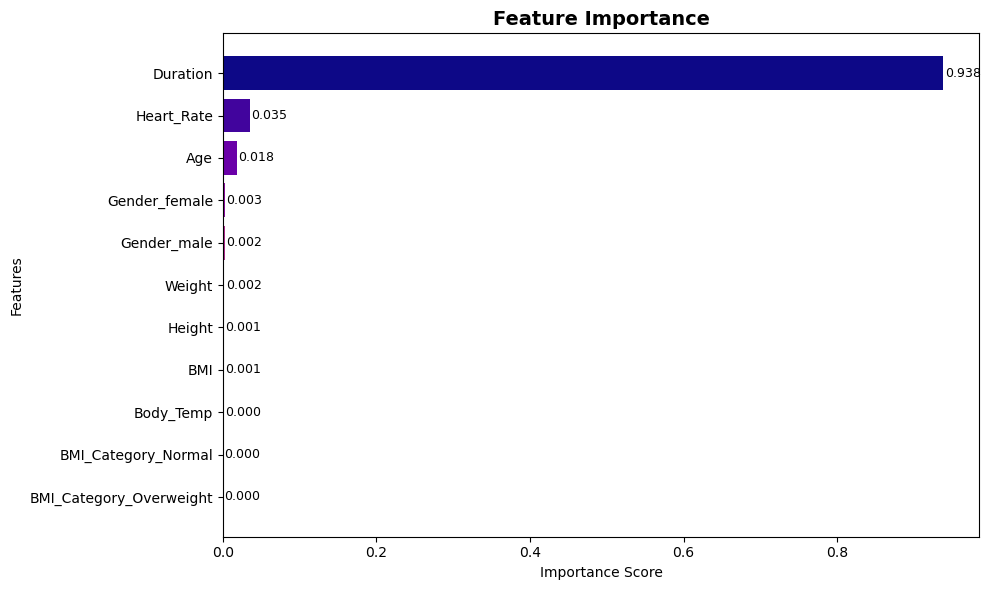

In [50]:
# I plotted a horizontal bar plot 

plt.figure(figsize=(10,6))
plt.barh(range(len(importance)), importance[sort], color=plt.cm.plasma(np.linspace(0,1,len(importance))))  
plt.yticks(range(len(importance)), np.array(feature_names)[sort])
plt.title("Feature Importance", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Features")

# I annotated values on bars
for i, v in enumerate(importance[sort]):
    plt.text(v + 0.002, i, f"{v:.3f}", fontsize=9, va='center')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

## Feature Importance Interpretation

From the feature importance plot, variables that had the greatest impact on predicting **Calories burned** are:  

1. **Duration (≈ 0.94)**  
   - By far the most important feature.  
   - This means the **length of the workout session** is the main driver of calorie burn.  
   - In real life: The longer you exercise, the more energy you expend — this dominates calorie predictions.  

2. **Heart Rate (≈ 0.035)**  
   - The second most important factor, but far less influential than Duration.  
   - Reflects how **intense the exercise** was.  
   - Higher heart rates during workouts usually mean more calories burned.  

3. **Age (≈ 0.018)**  
   - A smaller but noticeable effect.  
   - Suggests metabolic differences across ages; younger and middle-aged participants tend to burn slightly more calories with the same effort than older ones.  

4. **Gender, Weight, Height, and BMI (< 0.01 each)**  
   - These features contribute very little to overall calorie prediction in this dataset.  
   - While body composition and gender matter in physiology, their effect here is overshadowed by Duration and Heart Rate.  

5. **Body Temperature & BMI Categories (≈ 0.000)**  
   - Minimal to no impact in this model.  
   - Likely not useful predictors when Duration already explains most calorie variation.  


### Key Insights:
- **Duration dominates calorie prediction (93+%)** - the model heavily relies on how long someone exercised.  
- **Heart Rate provides additional intensity context** but plays a much smaller role (3.5%).  
- **Age has minor influence**, while **Gender, Weight, Height, BMI, and Body Temp add negligible predictive power**.  

In real-world fitness terms:  
Calorie burn is driven primarily by **how long you exercise** and **how hard your body works** (heart rate). Factors like age and body size make small adjustments, but they don’t outweigh duration.  
This aligns with how most fitness trackers work: run longer → burn more calories, higher heart rate → faster burn.  

## SAVING AND DEPLOYING MODEL

Once the best model was choosen (Random Forest Regressor in this case) and combined with preprocessing steps, the next step is to **save the full pipeline** so that it can be easily reused for deployment (without retraining).

- **Pipeline Creation**: Combines preprocessing (scaling, encoding) and the trained model.  
- **Fit on Full Data**: To use all available data and maximize performance before deployment.  
- **Saving with Joblib**: I used `joblib.dump()` to save the pipeline to a `.pkl` file.  
This file can later be loaded in a deployment environment (like Streamlit) for real-time calorie burn predictions.  

This ensures that both preprocessing and model inference are packaged together, making the predictor reliable and production-ready.

In [51]:
# I imported the necessary libraries

import joblib 

In [52]:
# I created a final pipeline that combines preprocessing and the trained model

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])

In [53]:
# I fit the final pipeline on the entire dataset (X, y) so that it's fully trained before saving

final_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'BMI_Category'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [54]:
# I saved the trained pipeline to a pickle (.pkl) file

joblib.dump(final_model, "calorie_predictor.pkl")

['calorie_predictor.pkl']

## PREDICTION ON NEW DATA

After saving and deploying the trained Random Forest model as a pipeline, I can now test it on **new input data**. The steps followed here are:
1. **Created Input Data** → A dictionary is defined with values for all required features (Gender, Age, Height, Weight, Duration, Heart Rate, Body Temp).  
2. **Loaded Saved Model** → The pipeline saved as `calorie_predictor.pkl` was loaded using `joblib.load()`.  
3. **Converted to DataFrame** → The dictionary was converted into a one-row pandas DataFrame, matching the feature format during training.  
4. **Made Predictions** → The model was used to predict calories burned. Since the target variable was transformed (using square root), I applied `np.square()` to inverse-transform the output.  
5. **Displayed Results** → The predicted calories burned were printed in a user-friendly format.

This ensures that anyone can feed new input values and get a fast calorie burn prediction without retraining the model.

In [22]:
# I created a dictionary with new user data for prediction

data = {
    'Gender' : ['Female'], 
    'Age' : [30],
    'Height' : [145],
    'Weight' : [60],
    'Duration' : [30],
    'Heart_Rate' : [100], 
    'Body_Temp' : [38]
}

# I added the BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# I added the BMI category
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

# I checked the dataframe
print(df)

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp        BMI  \
0  Female   30     145      60        30         100         38  28.537455   

  BMI_Category  
0   Overweight  


In [23]:
# Import required libraries

import joblib
import pandas as pd
import numpy as np

In [24]:
# I loaded the previously saved model (pipeline) from disk

model = joblib.load('calorie_predictor.pkl')

In [25]:
# I showed the loaded model (Pipeline with preprocessing + RandomForest)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'BMI_Category'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [28]:
# I showed the input data as DataFrame

df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,BMI_Category
0,Female,30,145,60,30,100,38,28.537455,Overweight


In [29]:
# I used the loaded model for prediction

calorie = model.predict(df)

In [32]:
# Since the model was trained on sqrt-transformed target, I applied  inverse transformation to return predictions

prediction = np.square(calorie)

In [34]:
# I printed the predicted calorie burn in formatted text

print(f'Predicted Calorie Burned: {prediction[0]:.2f}kcal')

Predicted Calorie Burned: 155.16kcal


## OVERALL CONCLUSION  

In this project, I successfully developed a **machine learning model to predict calories burned** using demographic, physiological, and workout-related features. Through data exploration, feature engineering, and model evaluation, I identified the following key insights:  

- **Exercise Duration** was found to be the single most important predictor of calorie burn, followed by **Heart Rate** and, to a lesser extent, **Age**.  
- Features such as **Weight, Height, BMI, and Gender** contributed very little compared to workout-specific variables.  
- Among the models tested, **ensemble methods (Random Forest and Gradient Boosting)** outperformed simpler models like Linear Regression and Decision Trees, providing the most accurate and stable predictions.  
- Applying a **square root transformation to the target (Calories)** improved model performance and stabilized error metrics.  
- The final selected model (**Random Forest Regressor**) achieved outstanding accuracy with very low error and was saved for deployment.  

Finally, I deployed the trained model in a **Streamlit application**, allowing users to enter their personal and workout details to get real-time calorie burn predictions.  


This project demonstrates how **machine learning can provide accessible and personalized health insights**, helping fitness enthusiasts track progress and make data-driven decisions. A possible next step would be to expand the dataset, include different types of exercises, and integrate the model into wearable devices or mobile fitness applications.  